In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR #線形回帰モデル
import seaborn as sns
#sns.set(font="IPAexGothic",style="white")


In [2]:
#上限表示数を拡張
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#data check
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv", header=None)

#data 中身閲覧
# train data
train.head()

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,3.017,11,0.149,0.468,0.900,0.137,36,0.000,0.529,2.188,1.167,36,10.956,14.038,20.866,23.880,45,30.207,70.426,94.202,994.051,59,1004.137,1015.721,1023.398,89.588,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,20.524,31,0.096,0.102,16.152,61.550,45,0.099,0.301,5.411,6.401,71,24.113,30.125,36.678,37.327,50,49.034,74.276,92.975,467.112,69,938.085,970.252,1080.000,7.320,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,125.224,36,1.392,1.464,47.652,515.570,111,0.972,2.751,12.230,30.518,148,0.000,0.000,23.226,131.280,138,25.919,69.069,100.000,1292.191,153,880.000,880.000,1018.200,4655.348,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,304.731,50,2.957,3.230,14.056,25.630,176,14.959,17.471,24.221,20.883,101,16.423,19.819,20.044,3.188,111,73.504,86.920,100.000,85.028,141,1011.703,1016.545,1018.364,10.898,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,353.549,47,0.422,5.794,9.972,9.234,80,14.911,21.140,32.584,74.298,55,10.297,11.822,13.377,2.311,155,51.918,76.736,96.533,484.188,124,1019.521,1022.992,1027.611,15.142,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [6]:
#test data都市名変換
change_city_df = pd.read_csv('change_city.csv')
change_city_df

,City,n_city
0,Adelaide,Melbourne
1,Sydney,Wollongong
2,Brussels,Antwerpen
3,Sarajevo,Zenica
4,São José dos Campos,São Paulo
5,Surrey,Vancouver
6,Concepción,Los Ángeles
7,Santiago,Quilpué
8,Changchun,Harbin
9,Chongqing,Chengdu


In [7]:
test_ex = pd.merge(test,change_city_df,how='left',on='City')

In [9]:
test_ex=test_ex.drop(columns='City')

In [10]:
test_ex=test_ex.rename(columns={'n_city':'City'})

In [11]:
df_pm_mean = pd.DataFrame(train.groupby(['City','month'])['pm25_mid'].mean())
df_pm_mean = df_pm_mean.reset_index()
df_pm_mean

,City,month,pm25_mid
0,Adapazarı,1,81.881971
1,Adapazarı,2,87.934492
2,Adapazarı,3,57.919250
3,Adapazarı,4,60.109356
4,Adapazarı,5,48.797348
...,...,...,...
2806,Ōita,8,46.838576
2807,Ōita,9,34.826057
2808,Ōita,10,47.462934
2809,Ōita,11,39.388067


In [12]:
df_pm_mean=df_pm_mean.rename(columns={'pm25_mid':'pm25_mean'})

In [14]:
#train/test concat
df_all = pd.concat([train,test_ex])

In [16]:
#meanをconcat
df_all=pd.merge(df_all,df_pm_mean,how='left',on=['City','month'])
df_all

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,pm25_mean
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,3.017,11,0.149,0.468,0.900,0.137,36,0.000,0.529,2.188,1.167,36,10.956,14.038,20.866,23.880,45,30.207,70.426,94.202,994.051,59,1004.137,1015.721,1023.398,89.588,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,33.808158
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,20.524,31,0.096,0.102,16.152,61.550,45,0.099,0.301,5.411,6.401,71,24.113,30.125,36.678,37.327,50,49.034,74.276,92.975,467.112,69,938.085,970.252,1080.000,7.320,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,28.573727
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,125.224,36,1.392,1.464,47.652,515.570,111,0.972,2.751,12.230,30.518,148,0.000,0.000,23.226,131.280,138,25.919,69.069,100.000,1292.191,153,880.000,880.000,1018.200,4655.348,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,43.757293
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,304.731,50,2.957,3.230,14.056,25.630,176,14.959,17.471,24.221,20.883,101,16.423,19.819,20.044,3.188,111,73.504,86.920,100.000,85.028,141,1011.703,1016.545,1018.364,10.898,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,71.098849
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,353.549,47,0.422,5.794,9.972,9.234,80,14.911,21.140,32.584,74.298,55,10.297,11.822,13.377,2.311,155,51.918,76.736,96.533,484.188,124,1019.521,1022.992,1027.611,15.142,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,45.720391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249445,249446,2021,12,31,Turkey,Antakya,36.98615,35.32531,97,4.674,9.034,14.650,23.900,90,11.798,21.871,28.693,67.294,88,3.699,7.816,44.080,391.178,83,0.829,5.287,42.481,417.102,92,8.354,12.533,18.784,26.241,94,34.495,47.605,73.066,352.286,95,914.666,963.444,1080.000,3.863,93,0.201,2.878,7.397,12.130,86,0.451,3.112,4.512,3.938,NaN,112.648742
249446,249447,2021,12,31,Turkey,Istanbul,40.19559,29.06013,123,17.621,18.156,21.877,4.390,116,0.882,6.559,14.794,46.421,109,4.295,8.558,59.418,706.550,104,8.884,14.335,30.304,111.588,112,5.241,9.273,11.543,9.674,118,71.775,83.258,100.000,190.221,105,989.638,1008.551,1024.879,35.258,114,0.473,1.491,2.974,1.468,115,3.894,6.823,6.861,2.145,NaN,69.052822
249447,249448,2021,12,31,Turkey,Erzurum,41.00500,39.72694,150,0.128,14.275,21.124,0.315,108,0.476,9.539,33.956,175.614,100,0.074,2.970,7.959,14.297,263,2.800,10.818,32.341,208.883,202,6.784,12.701,16.167,21.408,112,43.466,75.428,87.317,466.464,111,1002.984,1009.004,1025.333,37.266,179,1.001,3.605,5.040,3.965,12,5.269,8.772,12.661,13.201,NaN,127.241122
249448,249449,2021,12,31,United Kingdom,Southend-on-Sea,51.50853,-0.12574,21,0.057,0.111,2.088,0.988,54,0.301,2.029,24.479,138.410,40,0.230,0.478,0.884,0.102,77,1.326,9.441,9.838,17.650,111,10.690,16.795,18.424,14.548,66,44.049,84.531,94.643,603.074,118,1012.094,1019.240,1024.880,28.607,41,0.077,0.803,3.884,3.268,34,10.906,10.959,12.744,0.822,NaN,41.818333


In [17]:
df_all['pm25_mean'].isnull().sum()

564

In [19]:
#特徴量追加
df_all['co_range'] = df_all['co_max']-df_all['co_min']
df_all['o3_range']  = df_all['o3_max']-df_all['o3_min']
df_all['so2_range'] = df_all['so2_max']-df_all['so2_min']
df_all['no2_range'] = df_all['no2_max']-df_all['no2_min']
df_all['temperature_range'] = df_all['temperature_max']-df_all['temperature_min']
df_all['humidity_range'] = df_all['humidity_max']-df_all['humidity_min']
df_all['pressure_range'] = df_all['pressure_max']-df_all['pressure_min']
df_all['ws_range'] = df_all['ws_max']-df_all['ws_min']
df_all['dew_range'] = df_all['dew_max']-df_all['dew_min']

In [20]:
#特徴量追加
df_all['co_so2_no2_mid']=df_all['co_mid']+df_all['so2_mid']+df_all['no2_mid']
df_all['month_day'] = df_all['month']*100+df_all['day']
#移動平均(3日単位：都市単位に求める必要あり)
#df_all['co_so2_no2_mid_3rel'] = df_all['co_so2_no2_mid'].rolling(3).sum()
#df_all['co_so2_no2_mid_bf1'] = df_all['co_so2_no2_mid'].shift(1)

In [21]:
city_list = df_all['City'].unique()

In [22]:
len(city_list)

239

In [23]:
df_all['co_so2_no2_mid_3rel']=0
df_all['co_so2_no2_mid_7rel']=0
#df_all['co_so2_no2_mid_10rel']=0
#df_all['co_mid_3rel']=0
#df_all['so2_mid_3rel']=0
#df_all['no2_mid_3rel']=0
#df_all['co_so2_no2_mid_bf1']=0

In [24]:
for city in city_list:
    df_tmp = df_all[df_all['City']==city].copy()
    df_tmp['co_so2_no2_mid_3rel'] = df_tmp['co_so2_no2_mid'].rolling(3).sum()
    df_tmp['co_so2_no2_mid_7rel'] = df_tmp['co_so2_no2_mid'].rolling(7).sum()
    #df_tmp['co_so2_no2_mid_10rel'] = df_tmp['co_so2_no2_mid'].rolling(10).sum()
    #df_tmp['co_mid_3rel'] = df_tmp['co_mid'].rolling(3).sum()
    #df_tmp['so2_mid_3rel'] = df_tmp['so2_mid'].rolling(3).sum()
    #df_tmp['no2_mid_3rel'] = df_tmp['no2_mid'].rolling(3).sum()
    #df_tmp['co_so2_no2_mid_bf1'] = df_tmp['co_so2_no2_mid'].shift(1)
    df_all['co_so2_no2_mid_3rel'] = df_all['co_so2_no2_mid_3rel'].where(df_all['City']!=city,df_tmp['co_so2_no2_mid_3rel'])
    df_all['co_so2_no2_mid_7rel'] = df_all['co_so2_no2_mid_7rel'].where(df_all['City']!=city,df_tmp['co_so2_no2_mid_7rel'])
    #df_all['co_so2_no2_mid_10rel'] = df_all['co_so2_no2_mid_10rel'].where(df_all['City']!=city,df_tmp['co_so2_no2_mid_10rel'])
    #df_all['co_mid_3rel'] = df_all['co_mid_3rel'].where(df_all['City']!=city,df_tmp['co_mid_3rel'])
    #df_all['so2_mid_3rel'] = df_all['so2_mid_3rel'].where(df_all['City']!=city,df_tmp['so2_mid_3rel'])
    #df_all['no2_mid_3rel'] = df_all['no2_mid_3rel'].where(df_all['City']!=city,df_tmp['no2_mid_3rel'])
    #df_all['co_so2_no2_mid_bf1'] = df_all['co_so2_no2_mid_bf1'].where(df_all['City']!=city,df_tmp['co_so2_no2_mid_bf1'])

In [25]:
print(df_all['co_so2_no2_mid_3rel'].isnull().sum())
print(df_all['co_so2_no2_mid_7rel'].isnull().sum())
#print(df_all['co_so2_no2_mid_10rel'].isnull().sum())
#print(df_all['co_mid_3rel'].isnull().sum())
#print(df_all['so2_mid_3rel'].isnull().sum())
#print(df_all['no2_mid_3rel'].isnull().sum())
#print(df_all['co_so2_no2_mid_bf1'].isnull().sum())

478
1429


In [26]:
def month_offset(x):
    if x == 1 or x == 8:
        offset = 4
    elif x == 2 or x == 9:    
        offset = 2
    elif x == 3 or x == 10:
        offset = 0
    elif x == 4 or x == 11:
        offset = 5
    elif x == 5 or x == 12:
        offset = 3
    elif x == 6:
        offset = 1
    else:
        offset = 6
    return offset
#df_all['month_offset'] = df_all['month'].apply(month_offset)
df_all['year_week'] = df_all['month_day']/7
df_all['year_week'] = df_all['year_week'].round().astype(int)

In [27]:
df_tr = df_all[df_all['pm25_mid'].notnull()]
df_pm_mean2 = pd.DataFrame(df_tr.groupby(['Country','year_week'])['pm25_mid'].mean())
df_pm_mean2 = df_pm_mean2.reset_index()
df_pm_mean2

,Country,year_week,pm25_mid
0,Australia,20,73.382500
1,Australia,21,45.528728
2,Australia,22,39.946721
3,Australia,23,42.388754
4,Australia,24,42.728672
...,...,...,...
2438,Vietnam,242,112.236704
2439,Vietnam,243,69.464071
2440,Vietnam,244,70.604061
2441,Vietnam,245,81.243423


In [28]:
df_pm_mean2=df_pm_mean2.rename(columns={'pm25_mid':'pm25_mean2'})

In [29]:
#meanをconcat
df_all=pd.merge(df_all,df_pm_mean2,how='left',on=['Country','year_week'])
df_all

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,pm25_mean,co_range,o3_range,so2_range,no2_range,temperature_range,humidity_range,pressure_range,ws_range,dew_range,co_so2_no2_mid,month_day,co_so2_no2_mid_3rel,co_so2_no2_mid_7rel,year_week,pm25_mean2
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,3.017,11,0.149,0.468,0.900,0.137,36,0.000,0.529,2.188,1.167,36,10.956,14.038,20.866,23.880,45,30.207,70.426,94.202,994.051,59,1004.137,1015.721,1023.398,89.588,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,33.808158,1.884,3.519,0.751,2.188,9.910,63.995,19.261,2.860,7.441,3.587,101,NaN,NaN,20,73.382500
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,20.524,31,0.096,0.102,16.152,61.550,45,0.099,0.301,5.411,6.401,71,24.113,30.125,36.678,37.327,50,49.034,74.276,92.975,467.112,69,938.085,970.252,1080.000,7.320,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,28.573727,2.234,9.240,16.056,5.312,12.565,43.941,141.915,6.568,2.897,3.584,101,NaN,NaN,20,73.382500
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,125.224,36,1.392,1.464,47.652,515.570,111,0.972,2.751,12.230,30.518,148,0.000,0.000,23.226,131.280,138,25.919,69.069,100.000,1292.191,153,880.000,880.000,1018.200,4655.348,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,43.757293,1.010,22.696,46.260,11.258,23.226,74.081,138.200,8.089,5.113,5.412,101,NaN,NaN,20,73.382500
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,304.731,50,2.957,3.230,14.056,25.630,176,14.959,17.471,24.221,20.883,101,16.423,19.819,20.044,3.188,111,73.504,86.920,100.000,85.028,141,1011.703,1016.545,1018.364,10.898,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,71.098849,10.216,36.457,11.099,9.262,3.621,26.496,6.661,3.308,6.198,31.745,101,NaN,NaN,20,73.382500
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,353.549,47,0.422,5.794,9.972,9.234,80,14.911,21.140,32.584,74.298,55,10.297,11.822,13.377,2.311,155,51.918,76.736,96.533,484.188,124,1019.521,1022.992,1027.611,15.142,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,45.720391,6.411,38.251,9.550,17.673,3.080,44.615,8.090,2.896,11.181,35.615,101,NaN,NaN,20,73.382500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249445,249446,2021,12,31,Turkey,Antakya,36.98615,35.32531,97,4.674,9.034,14.650,23.900,90,11.798,21.871,28.693,67.294,88,3.699,7.816,44.080,391.178,83,0.829,5.287,42.481,417.102,92,8.354,12.533,18.784,26.241,94,34.495,47.605,73.066,352.286,95,914.666,963.444,1080.000,3.863,93,0.201,2.878,7.397,12.130,86,0.451,3.112,4.512,3.938,NaN,112.648742,9.976,16.895,40.381,41.652,10.430,38.571,165.334,7.196,4.061,22.137,1231,72.115,188.453,246,85.250134
249446,249447,2021,12,31,Turkey,Istanbul,40.19559,29.06013,123,17.621,18.156,21.877,4.390,116,0.882,6.559,14.794,46.421,109,4.295,8.558,59.418,706.550,104,8.884,14.335,30.304,111.588,112,5.241,9.273,11.543,9.674,118,71.775,83.258,100.000,190.221,105,989.638,1008.551,1024.879,35.258,114,0.473,1.491,2.974,1.468,115,3.894,6.823,6.861,2.145,NaN,69.052822,4.256,13.912,55.123,21.420,6.302,28.225,35.241,2.501,2.967,41.049,1231

In [30]:
df_all['pm25_mean2'].isnull().sum()

546

In [31]:
#特徴量Drop
#df_all = df_all.drop(["pm25_mean2"], axis=1)

In [32]:
#特徴量Drop
#df_all = df_all.drop(['co_cnt','o3_cnt','so2_cnt',"no2_cnt","temperature_cnt","humidity_cnt","pressure_cnt","ws_cnt","dew_cnt"], axis=1)
#df_all = df_all.drop(['co_var','o3_var','so2_var',"no2_var","temperature_var","humidity_var","pressure_var","ws_var","dew_var"], axis=1)
#df_all = df_all.drop(['co_min','o3_min','so2_min',"no2_min","temperature_min","humidity_min","pressure_min","ws_min","dew_min"], axis=1)

In [33]:
#Country,Cityの処理(一旦dummie変数化する)
df_all = pd.get_dummies(df_all,columns=['Country','City'])

In [34]:
#test/train 分離
train = df_all[df_all['pm25_mid'].notnull()]
test = df_all[df_all['pm25_mid'].isnull()]

In [35]:
train['pm25_mid'].isnull().sum()

0

In [36]:
test['pm25_mid'].isnull().sum()

53509

In [37]:
test = test.drop('pm25_mid',axis=1)

In [38]:
df_test = test.drop('id',axis=1)

In [39]:
df_train = train.drop(['pm25_mid','id'],axis=1)
df_target = train['pm25_mid']

In [40]:
#学習データ作成
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def get_train_data(df_train,df_target):
    X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.1,random_state=1)
    return X_train, X_test, y_train, y_test


In [41]:
X_train, X_test, y_train, y_test = get_train_data(df_train,df_target)

In [42]:
#学習モデル定義
def lightGBM_trainer(X_train_cv,y_train_cv,X_test_cv,y_test_cv):
    # 学習用
    train_data = lgb.Dataset(X_train_cv, y_train_cv,
                            free_raw_data=False)
    # 検証用
    eval_data = lgb.Dataset(X_test_cv, y_test_cv, reference=train_data,
                           free_raw_data=False)
    my_params  = {
        'objective': 'regression',
        'max_bin':250,
        'learning_rate': 0.05, # 学習率
        'max_depth': -1, # 木の数 (負の値で無制限)
        'num_leaves': 11, # 枝葉の数
        'metric': ('mean_absolute_error', 'mean_squared_error', 'rmse', 'multi'),
        'drop_rate': 0.15,
        'verbose': 0
    }
    print(my_params)
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model_lgb = lgb.train(my_params, 
                          train_data,
                          valid_names=['train', 'valid'],
                          valid_sets=[train_data,eval_data],
                          evals_result=evaluation_results,
                          num_boost_round=10000,
                          #early_stopping_rounds=100,
                          verbose_eval=50)
    return model_lgb

In [43]:
#評価関数
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def eval_model_lgb(model,X_test,y_test):
    # テストデータで予測する
    y_pred = model.predict(X_test)
    #y_pred_max = np.argmax(y_pred)
 
    score = np.sqrt(mean_squared_error(y_test,y_pred))
    #score = mean_absolute_error(y_test,y_pred)
    # 学習が終わったモデルをリストに入れておく
    models_lgm.append(model)
    sqr_scores_lgm.append(score)
    print(score)
    return y_pred

In [44]:
#cat boost
from catboost import CatBoostRegressor, FeaturesData, Pool

#学習モデル定義
def catboost_trainer(X_train_cv,y_train_cv,X_test_cv,y_test_cv):

    #cat boost
    train_pool = Pool(X_train_cv, y_train_cv)
    validate_pool = Pool(X_test_cv, y_test_cv)
    
    model_cat = CatBoostRegressor(iterations=10000,
                                  task_type="GPU",
                                  learning_rate=0.03, 
                                  depth=9, 
                                  eval_metric="RMSE", 
                                  early_stopping_rounds=1000,
                                  verbose=1000)
    model_cat.fit(train_pool)
    return model_cat

def eval_model_cat(model,X_test,y_test):
    # テストデータで予測する
    y_pred = model.predict(X_test)
 
    #squared err score
    score = np.sqrt(mean_squared_error(y_test,y_pred))
    models_cat.append(model)
    sqr_scores_cat.append(score)
    print(score)
    return y_pred

In [45]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#学習モデル定義
def rf_trainer(X_train_cv,y_train_cv,X_test_cv,y_test_cv):
    #RandomFOREST
    model_rf = RandomForestRegressor(random_state=1)
    model_rf.fit(X_train_cv,y_train_cv)
    return model_rf

def eval_model_rf(model_rf,X_test,y_test):
    y_pred = model_rf.predict(X_test)
    #squared err score
    score = mean_squared_error(y_test,y_pred)
    models_rf.append(model_rf)
    sqr_scores_rf.append(score)
    print(np.sqrt(score))
    return y_pred

In [46]:
#学習
#light GBM
import lightgbm as lgb


# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

#KFold
kf = KFold(n_splits=3)

models_lgm = []
models_cat = []
models_rf = []
sqr_scores_lgm = []
sqr_scores_cat = []
sqr_scores_rf = []

#y_train_index list
for train_cv_no, eval_cv_no in kf.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]

    #Light GBM
    model_lgm = lightGBM_trainer(X_train_cv,y_train_cv,X_eval_cv,y_eval_cv)
    eval_model_lgb(model_lgm,X_eval_cv,y_eval_cv)

    #catboost
    model_cat = catboost_trainer(X_train_cv,y_train_cv,X_eval_cv,y_eval_cv)
    eval_model_cat(model_cat,X_eval_cv,y_eval_cv)

    #RF
    #model_rf = rf_trainer(X_train_cv,y_train_cv,X_eval_cv,y_eval_cv)
    #eval_model_rf(model_rf,X_eval_cv,y_eval_cv)


{'objective': 'regression', 'max_bin': 250, 'learning_rate': 0.05, 'max_depth': -1, 'num_leaves': 11, 'metric': ('mean_absolute_error', 'mean_squared_error', 'rmse', 'multi'), 'drop_rate': 0.15, 'verbose': 0}


C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[50]	train's l1: 16.9683	train's l2: 528.422	train's rmse: 22.9874	valid's l1: 17.0367	valid's l2: 537.603	valid's rmse: 23.1863
[100]	train's l1: 15.7795	train's l2: 465.194	train's rmse: 21.5683	valid's l1: 15.9302	valid's l2: 477.532	valid's rmse: 21.8525
[150]	train's l1: 15.3408	train's l2: 441.759	train's rmse: 21.0181	valid's l1: 15.5417	valid's l2: 456.622	valid's rmse: 21.3687
[200]	train's l1: 15.0775	train's l2: 427.469	train's rmse: 20.6753	valid's l1: 15.3172	valid's l2: 444.655	valid's rmse: 21.0868
[250]	train's l1: 14.8927	train's l2: 417.389	train's rmse: 20.4301	valid's l1: 15.1664	valid's l2: 436.447	valid's rmse: 20.8913
[300]	train's l1: 14.7447	

[3100]	train's l1: 12.2424	train's l2: 274.232	train's rmse: 16.56	valid's l1: 13.9881	valid's l2: 376.391	valid's rmse: 19.4008
[3150]	train's l1: 12.2156	train's l2: 272.936	train's rmse: 16.5208	valid's l1: 13.9827	valid's l2: 376.178	valid's rmse: 19.3953
[3200]	train's l1: 12.1871	train's l2: 271.5	train's rmse: 16.4773	valid's l1: 13.9776	valid's l2: 375.932	valid's rmse: 19.389
[3250]	train's l1: 12.1597	train's l2: 270.132	train's rmse: 16.4357	valid's l1: 13.9722	valid's l2: 375.654	valid's rmse: 19.3818
[3300]	train's l1: 12.1334	train's l2: 268.806	train's rmse: 16.3953	valid's l1: 13.9677	valid's l2: 375.45	valid's rmse: 19.3765
[3350]	train's l1: 12.1052	train's l2: 267.393	train's rmse: 16.3522	valid's l1: 13.963	valid's l2: 375.257	valid's rmse: 19.3715
[3400]	train's l1: 12.0794	train's l2: 266.153	train's rmse: 16.3142	valid's l1: 13.9606	valid's l2: 375.161	valid's rmse: 19.3691
[3450]	train's l1: 12.0529	train's l2: 264.857	train's rmse: 16.2744	valid's l1: 13.9565	v

[6250]	train's l1: 10.7646	train's l2: 207.825	train's rmse: 14.4161	valid's l1: 13.804	valid's l2: 369.218	valid's rmse: 19.2151
[6300]	train's l1: 10.744	train's l2: 206.975	train's rmse: 14.3866	valid's l1: 13.8034	valid's l2: 369.202	valid's rmse: 19.2146
[6350]	train's l1: 10.7248	train's l2: 206.228	train's rmse: 14.3606	valid's l1: 13.8025	valid's l2: 369.188	valid's rmse: 19.2143
[6400]	train's l1: 10.706	train's l2: 205.418	train's rmse: 14.3324	valid's l1: 13.8003	valid's l2: 369.062	valid's rmse: 19.211
[6450]	train's l1: 10.6852	train's l2: 204.565	train's rmse: 14.3026	valid's l1: 13.7989	valid's l2: 369.008	valid's rmse: 19.2096
[6500]	train's l1: 10.6651	train's l2: 203.754	train's rmse: 14.2743	valid's l1: 13.7965	valid's l2: 368.901	valid's rmse: 19.2068
[6550]	train's l1: 10.645	train's l2: 202.962	train's rmse: 14.2465	valid's l1: 13.7947	valid's l2: 368.823	valid's rmse: 19.2048
[6600]	train's l1: 10.6255	train's l2: 202.198	train's rmse: 14.2196	valid's l1: 13.7921

[9400]	train's l1: 9.62335	train's l2: 164.26	train's rmse: 12.8164	valid's l1: 13.7373	valid's l2: 367.154	valid's rmse: 19.1613
[9450]	train's l1: 9.60803	train's l2: 163.702	train's rmse: 12.7946	valid's l1: 13.7365	valid's l2: 367.143	valid's rmse: 19.161
[9500]	train's l1: 9.59238	train's l2: 163.131	train's rmse: 12.7723	valid's l1: 13.7356	valid's l2: 367.107	valid's rmse: 19.16
[9550]	train's l1: 9.57598	train's l2: 162.549	train's rmse: 12.7495	valid's l1: 13.735	valid's l2: 367.091	valid's rmse: 19.1596
[9600]	train's l1: 9.55992	train's l2: 161.996	train's rmse: 12.7278	valid's l1: 13.7338	valid's l2: 367.03	valid's rmse: 19.158
[9650]	train's l1: 9.54298	train's l2: 161.416	train's rmse: 12.705	valid's l1: 13.7331	valid's l2: 367.04	valid's rmse: 19.1583
[9700]	train's l1: 9.52706	train's l2: 160.866	train's rmse: 12.6833	valid's l1: 13.7319	valid's l2: 367.025	valid's rmse: 19.1579
[9750]	train's l1: 9.51189	train's l2: 160.351	train's rmse: 12.663	valid's l1: 13.7314	vali

C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[50]	train's l1: 16.9547	train's l2: 529.268	train's rmse: 23.0058	valid's l1: 17.1077	valid's l2: 538.333	valid's rmse: 23.202
[100]	train's l1: 15.8003	train's l2: 467.502	train's rmse: 21.6218	valid's l1: 15.9764	valid's l2: 477.415	valid's rmse: 21.8498
[150]	train's l1: 15.3588	train's l2: 444.085	train's rmse: 21.0733	valid's l1: 15.5505	valid's l2: 455.492	valid's rmse: 21.3423
[200]	train's l1: 15.091	train's l2: 429.27	train's rmse: 20.7188	valid's l1: 15.3096	valid's l2: 442.446	valid's rmse: 21.0344
[250]	train's l1: 14.8988	train's l2: 418.683	train's rmse: 20.4617	valid's l1: 15.1499	valid's l2: 433.963	valid's rmse: 20.8318
[300]	train's l1: 14.7525	tra

[3100]	train's l1: 12.2498	train's l2: 274.959	train's rmse: 16.5819	valid's l1: 13.9737	valid's l2: 373.919	valid's rmse: 19.337
[3150]	train's l1: 12.2204	train's l2: 273.486	train's rmse: 16.5374	valid's l1: 13.9669	valid's l2: 373.544	valid's rmse: 19.3273
[3200]	train's l1: 12.1939	train's l2: 272.207	train's rmse: 16.4987	valid's l1: 13.9629	valid's l2: 373.363	valid's rmse: 19.3226
[3250]	train's l1: 12.1646	train's l2: 270.882	train's rmse: 16.4585	valid's l1: 13.9555	valid's l2: 373.021	valid's rmse: 19.3137
[3300]	train's l1: 12.1382	train's l2: 269.579	train's rmse: 16.4188	valid's l1: 13.951	valid's l2: 372.793	valid's rmse: 19.3079
[3350]	train's l1: 12.1125	train's l2: 268.355	train's rmse: 16.3815	valid's l1: 13.946	valid's l2: 372.505	valid's rmse: 19.3004
[3400]	train's l1: 12.0875	train's l2: 267.142	train's rmse: 16.3445	valid's l1: 13.942	valid's l2: 372.318	valid's rmse: 19.2955
[3450]	train's l1: 12.0601	train's l2: 265.816	train's rmse: 16.3039	valid's l1: 13.937

[6250]	train's l1: 10.7631	train's l2: 207.854	train's rmse: 14.4171	valid's l1: 13.7909	valid's l2: 365.747	valid's rmse: 19.1245
[6300]	train's l1: 10.7428	train's l2: 207.006	train's rmse: 14.3877	valid's l1: 13.7891	valid's l2: 365.667	valid's rmse: 19.1224
[6350]	train's l1: 10.7218	train's l2: 206.136	train's rmse: 14.3574	valid's l1: 13.7869	valid's l2: 365.554	valid's rmse: 19.1195
[6400]	train's l1: 10.7011	train's l2: 205.296	train's rmse: 14.3282	valid's l1: 13.7847	valid's l2: 365.488	valid's rmse: 19.1177
[6450]	train's l1: 10.6804	train's l2: 204.494	train's rmse: 14.3001	valid's l1: 13.783	valid's l2: 365.433	valid's rmse: 19.1163
[6500]	train's l1: 10.6592	train's l2: 203.629	train's rmse: 14.2699	valid's l1: 13.7807	valid's l2: 365.336	valid's rmse: 19.1138
[6550]	train's l1: 10.6403	train's l2: 202.872	train's rmse: 14.2433	valid's l1: 13.7795	valid's l2: 365.259	valid's rmse: 19.1117
[6600]	train's l1: 10.621	train's l2: 202.121	train's rmse: 14.2169	valid's l1: 13.7

[9400]	train's l1: 9.62433	train's l2: 164.596	train's rmse: 12.8295	valid's l1: 13.7067	valid's l2: 362.391	valid's rmse: 19.0366
[9450]	train's l1: 9.60795	train's l2: 163.996	train's rmse: 12.8061	valid's l1: 13.7055	valid's l2: 362.334	valid's rmse: 19.0351
[9500]	train's l1: 9.59155	train's l2: 163.446	train's rmse: 12.7846	valid's l1: 13.7046	valid's l2: 362.294	valid's rmse: 19.034
[9550]	train's l1: 9.57642	train's l2: 162.941	train's rmse: 12.7648	valid's l1: 13.7041	valid's l2: 362.298	valid's rmse: 19.0341
[9600]	train's l1: 9.55913	train's l2: 162.335	train's rmse: 12.7411	valid's l1: 13.7024	valid's l2: 362.223	valid's rmse: 19.0321
[9650]	train's l1: 9.54346	train's l2: 161.768	train's rmse: 12.7188	valid's l1: 13.7027	valid's l2: 362.227	valid's rmse: 19.0323
[9700]	train's l1: 9.5266	train's l2: 161.181	train's rmse: 12.6957	valid's l1: 13.7008	valid's l2: 362.135	valid's rmse: 19.0299
[9750]	train's l1: 9.51123	train's l2: 160.658	train's rmse: 12.6751	valid's l1: 13.6

C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[50]	train's l1: 16.9817	train's l2: 531.45	train's rmse: 23.0532	valid's l1: 16.9779	valid's l2: 529.929	valid's rmse: 23.0202
[100]	train's l1: 15.8	train's l2: 467.001	train's rmse: 21.6102	valid's l1: 15.8462	valid's l2: 470.598	valid's rmse: 21.6933
[150]	train's l1: 15.3491	train's l2: 443.109	train's rmse: 21.0502	valid's l1: 15.4388	valid's l2: 450.974	valid's rmse: 21.2362
[200]	train's l1: 15.0801	train's l2: 428.263	train's rmse: 20.6945	valid's l1: 15.2107	valid's l2: 439.449	valid's rmse: 20.9631
[250]	train's l1: 14.8968	train's l2: 417.967	train's rmse: 20.4442	valid's l1: 15.0635	valid's l2: 431.877	valid's rmse: 20.7816
[300]	train's l1: 14.7536	trai

[3100]	train's l1: 12.2527	train's l2: 274.28	train's rmse: 16.5614	valid's l1: 13.9403	valid's l2: 377.133	valid's rmse: 19.4199
[3150]	train's l1: 12.2229	train's l2: 272.823	train's rmse: 16.5174	valid's l1: 13.9345	valid's l2: 376.868	valid's rmse: 19.4131
[3200]	train's l1: 12.1951	train's l2: 271.501	train's rmse: 16.4773	valid's l1: 13.9285	valid's l2: 376.661	valid's rmse: 19.4077
[3250]	train's l1: 12.1682	train's l2: 270.196	train's rmse: 16.4376	valid's l1: 13.9233	valid's l2: 376.435	valid's rmse: 19.4019
[3300]	train's l1: 12.1417	train's l2: 268.908	train's rmse: 16.3984	valid's l1: 13.9183	valid's l2: 376.203	valid's rmse: 19.396
[3350]	train's l1: 12.1155	train's l2: 267.638	train's rmse: 16.3596	valid's l1: 13.9143	valid's l2: 375.995	valid's rmse: 19.3906
[3400]	train's l1: 12.0885	train's l2: 266.367	train's rmse: 16.3207	valid's l1: 13.9101	valid's l2: 375.744	valid's rmse: 19.3841
[3450]	train's l1: 12.0613	train's l2: 265.016	train's rmse: 16.2793	valid's l1: 13.9

[6250]	train's l1: 10.7596	train's l2: 207.29	train's rmse: 14.3976	valid's l1: 13.7543	valid's l2: 369.963	valid's rmse: 19.2344
[6300]	train's l1: 10.7401	train's l2: 206.481	train's rmse: 14.3695	valid's l1: 13.7538	valid's l2: 369.9	valid's rmse: 19.2328
[6350]	train's l1: 10.7186	train's l2: 205.621	train's rmse: 14.3395	valid's l1: 13.7521	valid's l2: 369.871	valid's rmse: 19.232
[6400]	train's l1: 10.6988	train's l2: 204.821	train's rmse: 14.3116	valid's l1: 13.7511	valid's l2: 369.85	valid's rmse: 19.2315
[6450]	train's l1: 10.6773	train's l2: 203.976	train's rmse: 14.282	valid's l1: 13.7483	valid's l2: 369.745	valid's rmse: 19.2288
[6500]	train's l1: 10.6561	train's l2: 203.134	train's rmse: 14.2525	valid's l1: 13.7459	valid's l2: 369.659	valid's rmse: 19.2265
[6550]	train's l1: 10.6359	train's l2: 202.335	train's rmse: 14.2245	valid's l1: 13.7443	valid's l2: 369.602	valid's rmse: 19.225
[6600]	train's l1: 10.6168	train's l2: 201.572	train's rmse: 14.1976	valid's l1: 13.7434	v

[9400]	train's l1: 9.61317	train's l2: 163.734	train's rmse: 12.7959	valid's l1: 13.6913	valid's l2: 367.808	valid's rmse: 19.1783
[9450]	train's l1: 9.59733	train's l2: 163.191	train's rmse: 12.7746	valid's l1: 13.6906	valid's l2: 367.76	valid's rmse: 19.1771
[9500]	train's l1: 9.58078	train's l2: 162.62	train's rmse: 12.7522	valid's l1: 13.6902	valid's l2: 367.771	valid's rmse: 19.1774
[9550]	train's l1: 9.5637	train's l2: 162.024	train's rmse: 12.7289	valid's l1: 13.6898	valid's l2: 367.76	valid's rmse: 19.1771
[9600]	train's l1: 9.54802	train's l2: 161.481	train's rmse: 12.7075	valid's l1: 13.6895	valid's l2: 367.791	valid's rmse: 19.1779
[9650]	train's l1: 9.53213	train's l2: 160.93	train's rmse: 12.6858	valid's l1: 13.6895	valid's l2: 367.796	valid's rmse: 19.178
[9700]	train's l1: 9.51594	train's l2: 160.358	train's rmse: 12.6632	valid's l1: 13.6896	valid's l2: 367.795	valid's rmse: 19.178
[9750]	train's l1: 9.50013	train's l2: 159.806	train's rmse: 12.6414	valid's l1: 13.6902	v

In [47]:
from statistics import mean
print(mean(sqr_scores_lgm))
print(max(sqr_scores_lgm))
print(min(sqr_scores_lgm))

19.121027728186366
19.180991388279466
19.027097405262648


In [48]:
print(mean(sqr_scores_cat))
print(max(sqr_scores_cat))
print(min(sqr_scores_cat))

18.742643111417607
18.794737325233953
18.702723519093393


In [49]:
#print(np.sqrt(mean(sqr_scores_rf)))
#print(np.sqrt(max(sqr_scores_rf)))
#print(np.sqrt(min(sqr_scores_rf)))

In [58]:
#アンサンブル
lgm = 10
cat = 34
pred_mix_1 = ((models_lgm[0].predict(X_test)*lgm)+(models_cat[0].predict(X_test)*cat))/(lgm+cat)
pred_mix_2 = ((models_lgm[1].predict(X_test)*lgm)+(models_cat[1].predict(X_test)*cat))/(lgm+cat)
pred_mix_3 = ((models_lgm[2].predict(X_test)*lgm)+(models_cat[2].predict(X_test)*cat))/(lgm+cat)
score1 = np.sqrt(mean_squared_error(y_test,pred_mix_1))
score2 = np.sqrt(mean_squared_error(y_test,pred_mix_2))
score3 = np.sqrt(mean_squared_error(y_test,pred_mix_3))
print(score1)
print(score2)
print(score3)
print((score1+score2+score3)/3)

19.22855160214276
19.15355330376154
19.137458630272906
19.173187845392402


In [72]:
import matplotlib
# 日本語対応
matplotlib.rc('font', family='BIZ UDGothic')
def result_graph(pred,y_test):
    # 1.グラフのサイズを指定し、グラフの大きさを正方形になるように設定する
    plt.figure(figsize=(5,5))

    # 2.横軸を実測値、縦軸を予測値として、散布図を描く
    plt.scatter(y_test,pred)

    min_value = min(y_test)
    max_value = max(y_test)

    # 4.最小値と最大値を使い、x軸およびy軸の値域を指定する
    plt.xlim([min_value,max_value])
    plt.ylim([min_value,max_value])

    # 5.対角線を描く
    plt.plot([min_value,max_value],[min_value,max_value])

    #x軸とy軸に名前を付ける
    plt.xlabel("実績値")
    plt.ylabel("予測値")

    # 可視化結果を表示する為に必要な関数
    plt.show()

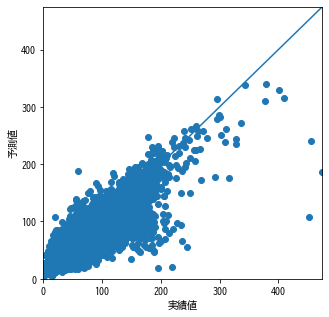

In [73]:
result_graph(pred_mix_1,y_test)

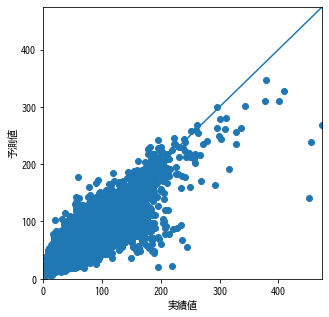

In [74]:
result_graph(pred_mix_2,y_test)

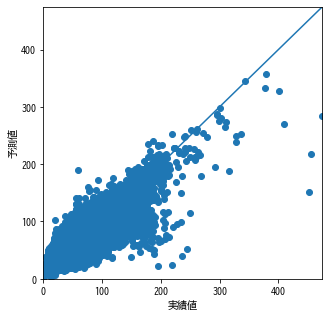

In [75]:
result_graph(pred_mix_3,y_test)

In [51]:
#高速テスト版
model_lgm_ = lightGBM_trainer(X_train,y_train,X_test,y_test)
model_cat_ = catboost_trainer(X_train,y_train,X_test,y_test)
#model_rf_ = rf_trainer(X_train,y_train,X_test,y_test)

NameError: name 'stop' is not defined

In [ ]:
pred_lgm_=eval_model_lgb(model_lgm_,X_test,y_test)
pred_cat_=eval_model_cat(model_cat_,X_test,y_test)
#pred_rf_=eval_model_rf(model_rf_,X_test,y_test)

In [ ]:
#アンサンブル

#pred_mix_ = ((models_lgm_.predict(X_test)*lgm)+(models_cat_.predict(X_test)*cat)+(models_rf_.predict(X_test)*rf))/(lgm+cat+rf)
pred_mix_ = ((models_lgm_.predict(X_test)*lgm)+(models_cat_.predict(X_test)*cat))/(lgm+cat)
score_ = np.sqrt(mean_squared_error(y_test,pred_mix_))
print(score_)

In [59]:
# 全データを用いたTraining
#Light GBM
model_lgm = lightGBM_trainer(df_train,df_target,X_test,y_test)

eval_model_lgb(model_lgm,X_test,y_test)
#eval_model_LR(model_lr,X_eval_cv,y_eval_cv)


{'objective': 'regression', 'max_bin': 250, 'learning_rate': 0.05, 'max_depth': -1, 'num_leaves': 11, 'metric': ('mean_absolute_error', 'mean_squared_error', 'rmse', 'multi'), 'drop_rate': 0.15, 'verbose': 0}


C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ykmay\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[50]	train's l1: 17.0069	train's l2: 533.827	train's rmse: 23.1047	valid's l1: 17.1335	valid's l2: 559.442	valid's rmse: 23.6525
[100]	train's l1: 15.843	train's l2: 471.741	train's rmse: 21.7196	valid's l1: 15.9719	valid's l2: 495.722	valid's rmse: 22.2648
[150]	train's l1: 15.4089	train's l2: 448.598	train's rmse: 21.1801	valid's l1: 15.5392	valid's l2: 470.7	valid's rmse: 21.6956
[200]	train's l1: 15.1475	train's l2: 434.692	train's rmse: 20.8493	valid's l1: 15.274	valid's l2: 455.969	valid's rmse: 21.3534
[250]	train's l1: 14.9708	train's l2: 424.7	train's rmse: 20.6083	valid's l1: 15.0971	valid's l2: 445.339	valid's rmse: 21.1031
[300]	train's l1: 14.8392	train'

[3100]	train's l1: 12.7578	train's l2: 302.047	train's rmse: 17.3795	valid's l1: 12.8023	valid's l2: 311.627	valid's rmse: 17.6529
[3150]	train's l1: 12.7359	train's l2: 300.936	train's rmse: 17.3475	valid's l1: 12.7792	valid's l2: 310.325	valid's rmse: 17.616
[3200]	train's l1: 12.7149	train's l2: 299.861	train's rmse: 17.3165	valid's l1: 12.7579	valid's l2: 309.229	valid's rmse: 17.5849
[3250]	train's l1: 12.6941	train's l2: 298.754	train's rmse: 17.2845	valid's l1: 12.7348	valid's l2: 307.99	valid's rmse: 17.5496
[3300]	train's l1: 12.6729	train's l2: 297.623	train's rmse: 17.2518	valid's l1: 12.7134	valid's l2: 306.672	valid's rmse: 17.5121
[3350]	train's l1: 12.653	train's l2: 296.576	train's rmse: 17.2214	valid's l1: 12.6938	valid's l2: 305.586	valid's rmse: 17.481
[3400]	train's l1: 12.6324	train's l2: 295.472	train's rmse: 17.1893	valid's l1: 12.6729	valid's l2: 304.271	valid's rmse: 17.4434
[3450]	train's l1: 12.6124	train's l2: 294.429	train's rmse: 17.1589	valid's l1: 12.652

[6250]	train's l1: 11.6421	train's l2: 246.742	train's rmse: 15.708	valid's l1: 11.6747	valid's l2: 252.65	valid's rmse: 15.895
[6300]	train's l1: 11.6273	train's l2: 246.053	train's rmse: 15.6861	valid's l1: 11.6612	valid's l2: 251.984	valid's rmse: 15.874
[6350]	train's l1: 11.6127	train's l2: 245.387	train's rmse: 15.6648	valid's l1: 11.6473	valid's l2: 251.318	valid's rmse: 15.853
[6400]	train's l1: 11.5969	train's l2: 244.678	train's rmse: 15.6422	valid's l1: 11.63	valid's l2: 250.504	valid's rmse: 15.8273
[6450]	train's l1: 11.5811	train's l2: 243.954	train's rmse: 15.619	valid's l1: 11.613	valid's l2: 249.713	valid's rmse: 15.8023
[6500]	train's l1: 11.5661	train's l2: 243.273	train's rmse: 15.5972	valid's l1: 11.5972	valid's l2: 249.043	valid's rmse: 15.7811
[6550]	train's l1: 11.5507	train's l2: 242.582	train's rmse: 15.575	valid's l1: 11.5806	valid's l2: 248.318	valid's rmse: 15.7581
[6600]	train's l1: 11.5358	train's l2: 241.892	train's rmse: 15.5529	valid's l1: 11.5655	vali

[9400]	train's l1: 10.7696	train's l2: 208.756	train's rmse: 14.4484	valid's l1: 10.783	valid's l2: 212.378	valid's rmse: 14.5732
[9450]	train's l1: 10.7568	train's l2: 208.233	train's rmse: 14.4303	valid's l1: 10.7703	valid's l2: 211.851	valid's rmse: 14.5551
[9500]	train's l1: 10.7448	train's l2: 207.748	train's rmse: 14.4135	valid's l1: 10.759	valid's l2: 211.348	valid's rmse: 14.5378
[9550]	train's l1: 10.7327	train's l2: 207.242	train's rmse: 14.3959	valid's l1: 10.7478	valid's l2: 210.869	valid's rmse: 14.5213
[9600]	train's l1: 10.7206	train's l2: 206.75	train's rmse: 14.3788	valid's l1: 10.7365	valid's l2: 210.4	valid's rmse: 14.5052
[9650]	train's l1: 10.7077	train's l2: 206.234	train's rmse: 14.3608	valid's l1: 10.7233	valid's l2: 209.797	valid's rmse: 14.4844
[9700]	train's l1: 10.6958	train's l2: 205.761	train's rmse: 14.3444	valid's l1: 10.7121	valid's l2: 209.279	valid's rmse: 14.4665
[9750]	train's l1: 10.6836	train's l2: 205.266	train's rmse: 14.3271	valid's l1: 10.699	

array([ 70.57695226,  77.93393695, 100.82018573, ...,  86.78322054,
        47.38079052,  68.43780844])

In [60]:
sqr_scores_lgm

[19.154994391016984, 19.027097405262648, 19.180991388279466, 14.35241412038915]

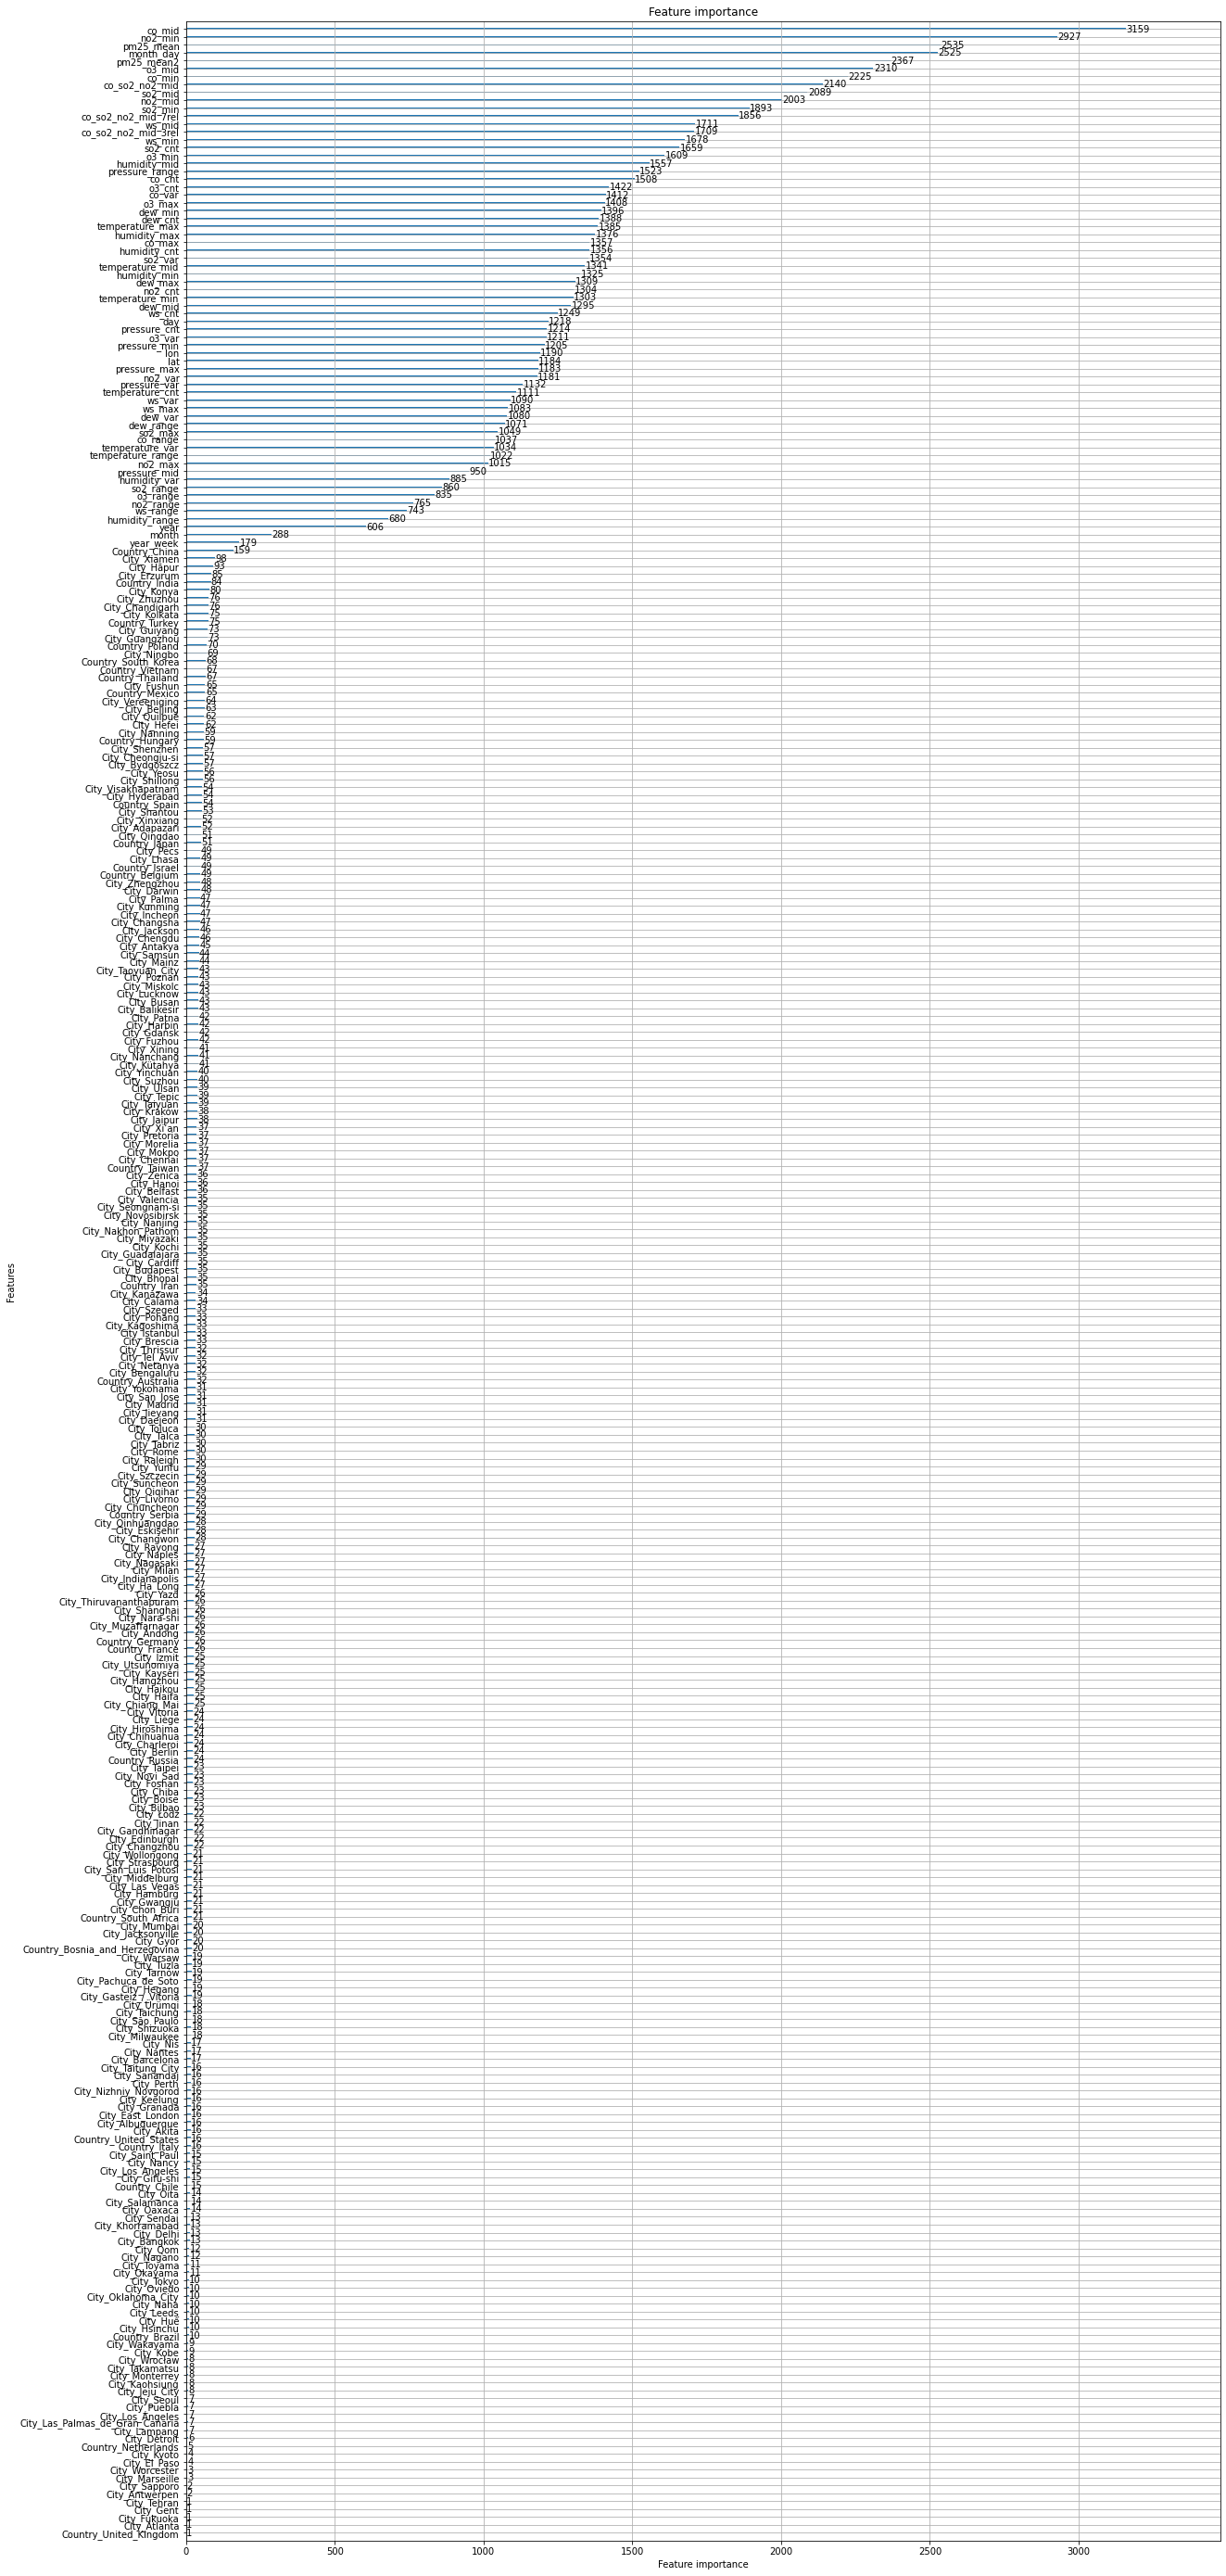

In [61]:
# 特徴量の重要度をプロットする
from matplotlib import pyplot as plt
lgb.plot_importance(model_lgm, figsize=(20, 50))
plt.show()

In [62]:
pred_lgm = model_lgm.predict(df_test)
#pred_lr = model_lr.predict(df_test)

In [63]:
pred_lgm

array([20.99452656, 44.4794432 , 28.38345157, ..., 83.48565592,
       31.8711344 , 34.07970891])

In [64]:
# 全データを用いたTraining
#catboost
model_cat = catboost_trainer(df_train,df_target,X_test,y_test)

0:	learn: 37.9025619	total: 12.6ms	remaining: 2m 6s
1000:	learn: 18.0134928	total: 11.3s	remaining: 1m 41s
2000:	learn: 16.6006742	total: 22.2s	remaining: 1m 28s
3000:	learn: 15.5465299	total: 33s	remaining: 1m 16s
4000:	learn: 14.6592220	total: 43.7s	remaining: 1m 5s
5000:	learn: 13.8684975	total: 54.7s	remaining: 54.7s
6000:	learn: 13.1671687	total: 1m 5s	remaining: 43.7s
7000:	learn: 12.5319005	total: 1m 16s	remaining: 32.8s
8000:	learn: 11.9369335	total: 1m 27s	remaining: 21.9s
9000:	learn: 11.3847569	total: 1m 38s	remaining: 11s
9999:	learn: 10.8698565	total: 1m 49s	remaining: 0us


In [65]:
pred_cat = model_cat.predict(df_test)

In [66]:
pred_cat

array([20.45469246, 45.60390193, 31.28216364, ..., 82.90700333,
       35.73075827, 35.67036744])

In [67]:
for col in df_test.columns:
    print(col)

year
month
day
lat
lon
co_cnt
co_min
co_mid
co_max
co_var
o3_cnt
o3_min
o3_mid
o3_max
o3_var
so2_cnt
so2_min
so2_mid
so2_max
so2_var
no2_cnt
no2_min
no2_mid
no2_max
no2_var
temperature_cnt
temperature_min
temperature_mid
temperature_max
temperature_var
humidity_cnt
humidity_min
humidity_mid
humidity_max
humidity_var
pressure_cnt
pressure_min
pressure_mid
pressure_max
pressure_var
ws_cnt
ws_min
ws_mid
ws_max
ws_var
dew_cnt
dew_min
dew_mid
dew_max
dew_var
pm25_mean
co_range
o3_range
so2_range
no2_range
temperature_range
humidity_range
pressure_range
ws_range
dew_range
co_so2_no2_mid
month_day
co_so2_no2_mid_3rel
co_so2_no2_mid_7rel
year_week
pm25_mean2
Country_Australia
Country_Belgium
Country_Bosnia and Herzegovina
Country_Brazil
Country_Canada
Country_Chile
Country_China
Country_Croatia
Country_France
Country_Germany
Country_Hungary
Country_India
Country_Iran
Country_Israel
Country_Italy
Country_Japan
Country_Mexico
Country_Netherlands
Country_Poland
Country_Russia
Country_Serbia
Count

In [68]:
sample

,0,1
0,195942,54.321
1,195943,54.321
2,195944,54.321
3,195945,54.321
4,195946,54.321
...,...,...
53504,249446,54.321
53505,249447,54.321
53506,249448,54.321
53507,249449,54.321


In [69]:
# testデータに適応
#sample[1] = pred_lgm
sample[1] = (pred_lgm*lgm+pred_cat*cat)/(lgm+cat)
sample

,0,1
0,195942,20.577382
1,195943,45.348343
2,195944,30.623365
3,195945,82.524012
4,195946,120.381568
...,...,...
53504,249446,102.498962
53505,249447,83.749101
53506,249448,83.038515
53507,249449,34.853571


In [70]:
sample.to_csv("sample_submit_v19.csv", index=None, header=None)